In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context = 'paper', style='whitegrid', font_scale = 1.4)

In [2]:
path = 'report.csv'
data = pd.read_csv(path, names=['Flag','nx','n_threads','Tempo','Resultado'])

def rename(name):
  name = name.replace('./laplace', '').replace('.out','').replace('_', ' -')
  if name == '': return 'nenhuma'
  return name

data.Flag = data.Flag.apply(lambda i: rename(i))
data.to_csv(path)

data

,Flag,nx,n_threads,Tempo,Resultado
0,nenhuma,512,1,5.148150,0.040274
1,nenhuma,1024,1,21.228200,0.057828
2,nenhuma,2048,1,110.250000,0.082086
3,-O3,512,1,2.344710,0.040274
4,-O3,1024,1,10.346200,0.057828
5,-O3,2048,1,51.925000,0.082086
6,-fopenmp,512,1,6.106440,0.040274
7,-fopenmp,512,2,3.184900,0.040274
8,-fopenmp,512,3,3.902320,0.040274
9,-fopenmp,512,4,3.097230,0.040274


In [3]:
serial = data[data.Flag == 'nenhuma']
O3 = data[data.Flag == ' -O3']
single_threads = pd.concat([serial,O3])

openMP = data[data.Flag == ' -fopenmp']
openMP_O3 = data[data.Flag == ' -fopenmp -O3']

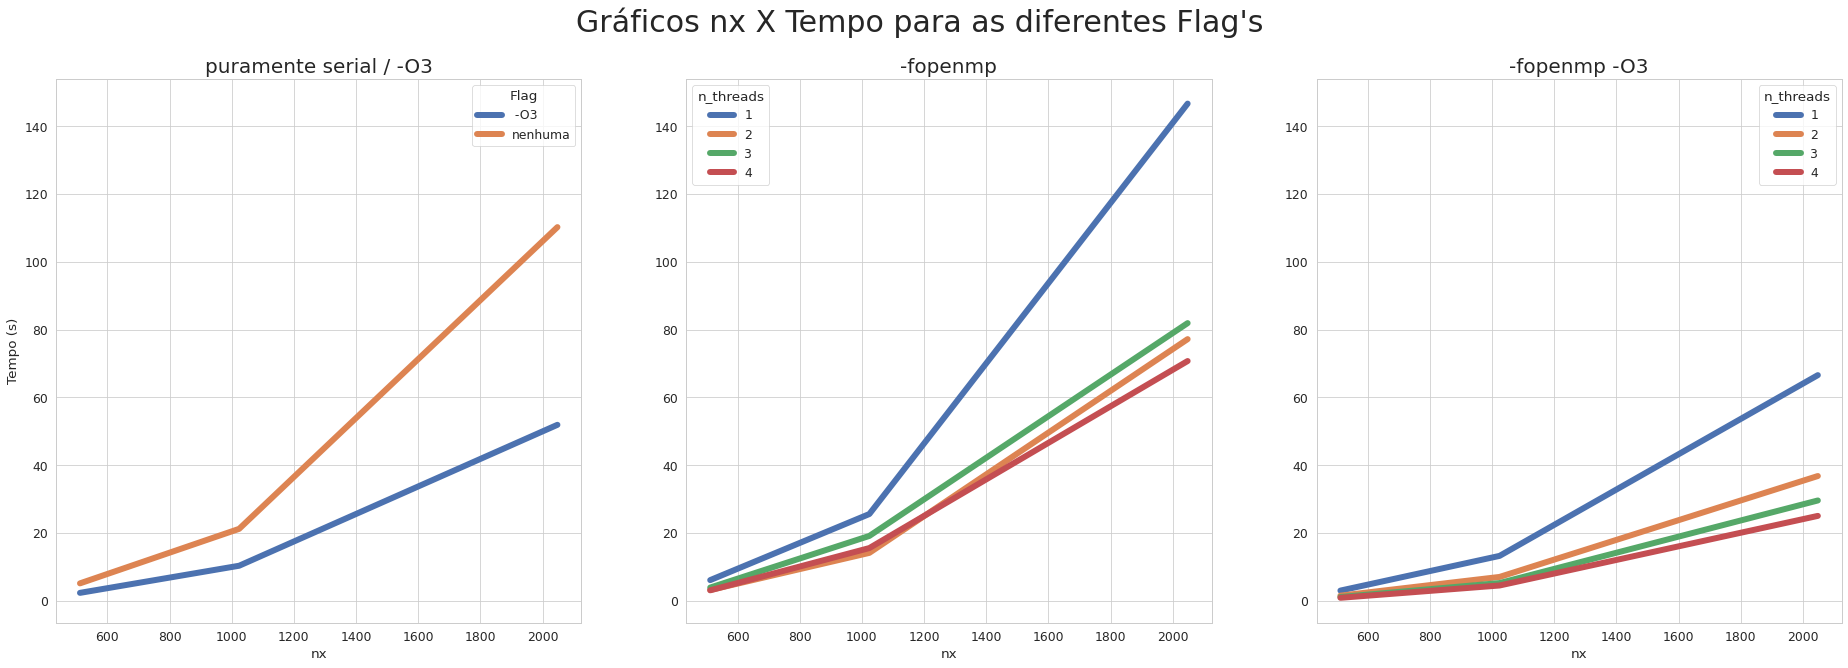

In [4]:
fig, axs = plt.subplots(1,3,figsize=(32,10), sharey=True)

single_threads.pivot_table("Tempo", "nx", "Flag").plot(ax = axs[0], linewidth=6, ylabel='Tempo (s)')
openMP.pivot_table("Tempo", "nx", "n_threads").plot(ax = axs[1], linewidth=6)
openMP_O3.pivot_table("Tempo", "nx", "n_threads").plot(ax = axs[2], linewidth=6)

fig.suptitle("Gráficos nx X Tempo para as diferentes Flag's", fontsize = 30)
axs[0].set_title('puramente serial / -O3',fontsize=20)
axs[1].set_title('-fopenmp',fontsize=20)
axs[2].set_title('-fopenmp -O3',fontsize=20)

axs[1].tick_params(labelleft=True)
axs[2].tick_params(labelleft=True)
plt.show()

In [5]:
fig.savefig('graph.jpeg')